In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
btc1mdata = pd.read_csv('/Users/micktor/Documents/Keras/btcusdgemini1m.csv')

In [3]:
btc1mdata.head(2)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1546300000000,1/1/19 1:09,BTCUSD,3690.50,3690.50,3690.4,3690.5,0.719779
1,1546300000000,1/1/19 1:08,BTCUSD,3692.85,3692.85,3690.5,3690.5,0.001084


In [4]:
btc1mdata.tail(2)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
226115,1560560000000,6/14/19 23:31,BTCUSD,8687.45,8729.17,8687.45,8729.17,31.177668
226116,1560560000000,6/14/19 23:30,BTCUSD,8681.27,8687.45,8681.27,8687.45,1.000000


In [5]:
btc1mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226117 entries, 0 to 226116
Data columns (total 8 columns):
Unix Timestamp    226117 non-null int64
Date              226117 non-null object
Symbol            226117 non-null object
Open              226117 non-null float64
High              226117 non-null float64
Low               226117 non-null float64
Close             226117 non-null float64
Volume            226117 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.8+ MB


In [6]:
btc1mframe = btc1mdata.iloc[:,[6,7]]

In [7]:
print(btc1mframe)

          Close     Volume
0       3690.50   0.719779
1       3690.50   0.001084
2       3692.85   0.090747
3       3693.35   0.411550
4       3693.85   0.000000
5       3693.85   0.000000
6       3693.85   0.027772
7       3695.96   0.674426
8       3696.16   0.133923
9       3696.35   0.009416
10      3696.16   0.105899
11      3694.39   0.055730
12      3692.37   0.267510
13      3699.41   1.384426
14      3696.11   2.594000
15      3700.00   0.624298
16      3700.00   0.052000
17      3700.00   0.029730
18      3700.00   0.100947
19      3700.00   0.000000
20      3700.00   0.015555
21      3697.67   0.075336
22      3695.52   1.326080
23      3695.50   0.026120
24      3695.50   0.123307
25      3695.00   1.349829
26      3691.68   0.013785
27      3691.68   0.005562
28      3691.68   0.000000
29      3691.68   0.041111
...         ...        ...
226087  8699.71   0.028163
226088  8700.92   0.069165
226089  8694.94   3.467066
226090  8681.97   5.327475
226091  8680.92   0.364869
2

In [8]:
input_data = btc1mframe

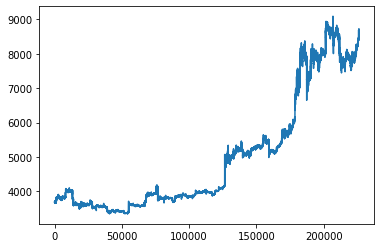

In [9]:
plt.plot(btc1mframe['Close'])

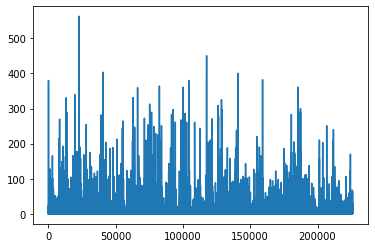

In [10]:
plt.plot(btc1mframe['Volume'])

In [11]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
input_data = scaler.fit_transform(btc1mframe)

In [14]:
len(input_data)

226117

In [15]:
lookback= 50

test_size=int(.3 * len(input_data))
X=[]
y=[]
for i in range(len(input_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [21]:
X, y= np.array(X), np.array(y)

In [22]:
X_test = X[:test_size+lookback]

In [23]:
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(226066, 50, 2)
(67885, 50, 2)


In [25]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=200, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
226066/226066 [==============================] - 884s 4ms/step - loss: 2.1769e-04
Epoch 2/200
 16800/226066 [=>............................] - ETA: 14:14 - loss: 2.2419e-04